# Preparation

In [142]:
# We'll need some modules
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
# Let's load and check out the data
movies = pd.read_csv("Data/movies.csv", encoding="latin1")
movies.head()

,Actor,Movie
0,"Chinlund, Nick",100 Mile Rule
1,"Mavity, Abigail",100 Mile Rule
2,"McKean, Michael",100 Mile Rule
3,"Carter, Jim",102 Dalmatians
4,"Crompton, Ben",102 Dalmatians


In [144]:
# In how many movies did Kevin Bacon play?
sum(movies.Actor == "Bacon, Kevin")

5

# Let's start with the graph

In [145]:
# A list of tuples is needed to create the edges.
edges = zip(movies.Actor, movies.Movie)

In [146]:
# An empty graph
G = nx.Graph()

In [147]:
# Adding actors as nodes
G.add_nodes_from(movies.Actor, color="red")
# and movies as nodes
G.add_nodes_from(movies.Movie, color="blue")

In [148]:
# Add edges
G.add_edges_from(edges)

In [149]:
# Let's see what we got.
print(G.number_of_nodes())
print(G.number_of_edges())

238
257


# Graph exploration

In [150]:
# In which movies did Bacon play?
print(G.neighbors("Bacon, Kevin"))

['Friday The 13th Parts I - VIII: From Crystal Lake To Manhattan ', 'Crazy Stupid Love', 'Apollo 13 ', 'Wild Things ', 'Tremors ']


In [151]:
print(nx.degree(G))

{'Dern, Bruce': 1, 'Donovan, Jeffrey': 1, 'Anchorman: The Legend Of Ron Burgundy ': 5, 'Shaver, Helen': 2, 'Brolin, James': 1, 'Academy Award Winning Movies, Vol. 1: Chicago / Frida / Life Is Beautiful': 5, 'Baer, Jean De': 1, 'Dillon, Matt': 1, 'Arkin, Alan': 1, 'Richards, Denise': 2, 'Banderas, Antonio': 3, 'Crystal, Billy': 1, 'Across The Moon': 5, 'Baker, Kenny': 1, 'Amityville Horror ': 2, 'Rourke, Mickey': 5, "All Stars: Children Of The Night / Maybe I'll Come Home In The Spring": 4, 'Ace Ventura: Pet Detective ': 2, 'Orser, Leland': 1, 'Bacon, Kevin': 5, 'Leonard, Joshua': 1, 'Buscemi, Steve': 5, '8 Mile ': 4, 'Tremors ': 2, 'DiResta, John': 1, 'Antony And Cleopatra ': 1, 'Basinger, Kim': 2, '9 1/2 Weeks ': 4, 'Campbell, Nicholas': 1, 'Sleepers ': 2, 'Bailey, Eion': 1, 'Rampling, Charlotte': 2, '9 Dead Gay Guys': 1, '100 Mile Rule': 3, 'Aaron, Caroline': 2, 'Quinlan, Kathleen': 2, 'Sedgwick, Kyra': 3, 'Ruehl, Mercedes': 3, '13th Warrior / Instinct ': 1, '1492: Conquest Of Paradi

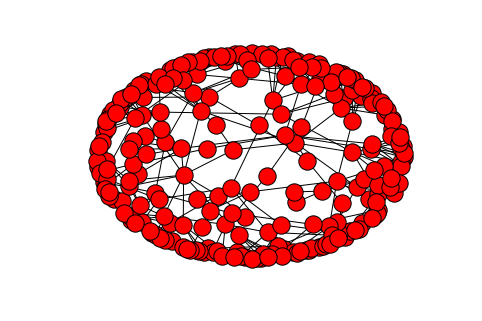

In [152]:
nx.draw(G)

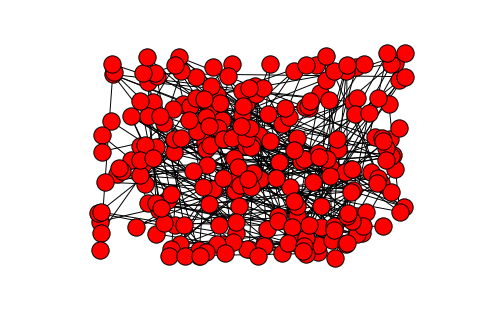

In [153]:
nx.draw_random(G)

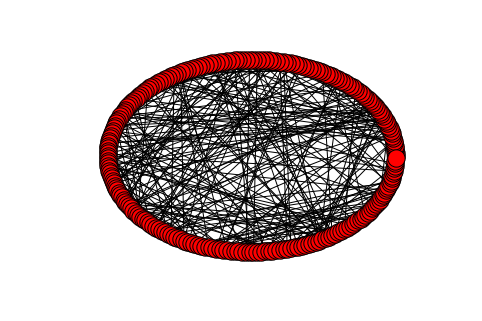

In [154]:
nx.draw_circular(G)
plt.savefig("test.png")

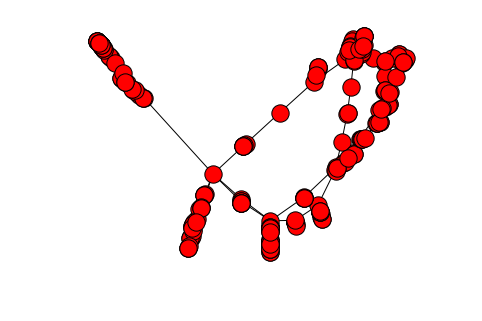

In [155]:
nx.draw_spectral(G)

In [186]:
# movies starring Kevin Bacon
movies_with_bacon = G.neighbors("Bacon, Kevin")
movies_with_bacon

['Friday The 13th Parts I - VIII: From Crystal Lake To Manhattan ',
 'Crazy Stupid Love',
 'Apollo 13 ',
 'Wild Things ',
 'Tremors ']

In [192]:
# actors playing together with Kevin Bacon in movies
for movie in movies_with_bacon:
    actors_with_bacon = G.neighbors(movie)
    print("{}:\n {}".format(movie, "\n ".join(actors_with_bacon)))

Friday The 13th Parts I - VIII: From Crystal Lake To Manhattan :
 Everhart, Rex
 Crosby, Harry
 Nelson, Mark
 Bacon, Kevin
Crazy Stupid Love:
 Carell, Steve
 Stone, Emma
 Bacon, Kevin
 Moore, Julianne
Apollo 13 :
 Sinise, Gary
 Quinlan, Kathleen
 Bacon, Kevin
Wild Things :
 Bacon, Kevin
 Richards, Denise
 Russell, Theresa
 Murray, Bill
 Campbell, Neve
 Dillon, Matt
Tremors :
 Shaver, Helen
 Bacon, Kevin


# Let's get some bacon numbers

In [193]:
# get the shortest path for all nodes to Kevin Bacon
p=nx.shortest_path_length(G,source="Bacon, Kevin")
# prepare a dictionary to store the numbers
bacon = dict()
# bacon number magic!
for actor in movies.Actor:
    bacon_nr = int(1 + p[actor]/2)
    bacon[actor] = bacon_nr

# and here they are, all bacon numbers!
print(bacon)

{'Ellis, Aunjanue': 5, 'Dern, Bruce': 4, 'Gordon-Levitt, Joseph': 3, 'Ben-Victor, Paul': 4, 'Shaver, Helen': 2, 'McKean, Michael': 4, 'DiResta, John': 5, 'Bancroft, Anne': 5, 'Farrell, Colin': 4, 'Everhart, Rex': 2, 'Bacon, Kevin': 1, 'Rudd, Paul': 3, 'Richards, Denise': 2, 'Bonet, Lisa': 5, 'Banderas, Antonio': 5, 'Davis, Julie': 5, 'Brolin, James': 3, 'Margulies, David': 4, 'Dalton, Timothy': 5, 'Ecker, Chris': 4, 'Baker, Kenny': 5, 'Rourke, Mickey': 4, 'Jiang, Franco': 5, 'Orser, Leland': 4, 'Baranski, Christine': 4, 'Leonard, Joshua': 5, 'Diesel, Vin': 4, 'Favreau, Jon': 4, 'Buscemi, Steve': 5, 'Martin, Steve': 5, 'Cromwell, James': 5, 'David, Eleanor': 5, 'Scott, Adam': 4, 'Basinger, Kim': 3, 'Carrey, Jim': 5, 'Campbell, Nicholas': 3, 'Bailey, Eion': 5, 'McNeice, Ian': 5, 'Rampling, Charlotte': 5, 'Johansson, Scarlett': 3, 'Barrymore, Drew': 5, 'Aaron, Caroline': 4, 'Quinlan, Kathleen': 2, 'Siemaszko, Nina': 5, 'Sedgwick, Kyra': 5, 'Moriarty, Cathy': 5, 'Baer, Jean De': 5, 'Ruehl,

## Quiztime: Week 7 of EX101x

In [194]:
# Assignment 7.5
print("Kim Basinger: {}".format(bacon["Basinger, Kim"]))
print("Steve Buscemi: {}".format(bacon["Buscemi, Steve"]))

Kim Basinger: 3
Steve Buscemi: 5


In [195]:
# Lisa Kudrow as source...let's make a function first.

# get the shortest path for all nodes to anyone
def bacon_anyone(anyone):
    p=nx.shortest_path_length(G,source=anyone)
    # prepare a dictionary to store the numbers
    bacon = dict()
    # bacon number magic!
    for actor in movies.Actor:
        bacon_nr = int(1 + p[actor]/2)
        bacon[actor] = bacon_nr
    return bacon

In [197]:
# Ok then, the Kudrow_number...
kudrow = bacon_anyone("Kudrow, Lisa")

print("Ben Affleck's Kudrow_number: {}".format(kudrow["Affleck, Ben"]))

Ben Affleck's Kudrow number: 3


In [199]:
# If we use Matt Damon as a the base (Matt Damon is now Kevin Bacon), what is Elizabeth Berridge’s Damon number?
damon = bacon_anyone("Damon, Matt")

print("Elizabeth Berridge's Damon_number: {}".format(damon["Berridge, Elizabeth"]))

Elizabeth Berridge's Damon_number: 4
